In [1]:
import numpy as np
import FuncParcel
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
import matplotlib as mpl
from matplotlib import colors
import pickle
from collections import Counter
%matplotlib inline

/usr/local/anaconda-1.9.2/lib/python2.7/site-packages/brainx/__init__.py:30: UserWarning: Monkeypatching NetworkX's Watts-Strogatz routine
  warnings.warn("Monkeypatching NetworkX's Watts-Strogatz routine")


# Thalamic Parcellation

In [67]:
#path to files ncessary for parcellation
path_to_adjmat = '/home/despoB/connectome-thalamus/Thalamic_parcel/NKI_mx_1400_cortex_plus_thalamus_parcorrmatavg'
path_to_list_of_subcorticalcortical_ROIs = '/home/despoB/connectome-thalamus/ROIs/Cortex_plus_thalamus_ROIs'
path_to_list_of_subcortical_voxels = '/home/despoB/connectome-thalamus/ROIs/thalamus_voxel_indices'
path_to_list_of_cortical_ROIs ='/home/despoB/connectome-thalamus/ROIs/Cortex_ROIs'
path_to_Cortical_CI = '/home/despoB/connectome-thalamus/ROIs/Cortex_ROIs'

#call function
Thalamocalcortical_Targets, Thalamo_ParcelCIs, _ = FuncParcel.parcel_subcortical_network(path_to_adjmat, \
            path_to_list_of_subcorticalcortical_ROIs, \
            path_to_list_of_subcortical_voxels, path_to_list_of_cortical_ROIs, path_to_Cortical_CI)

In [54]:
path_to_data_folder = '/home/despoB/kaihwang/bin/FuncParcel/Data'
partition = pickle.load(open(path_to_data_folder+"/Graph/graph_MGH_Craddock_300_cortical_min_cost0.02_min_weight2.0_min_size5", "rb"))
Cortical_CI=np.array(partition.community.membership) +1
Cortical_CI[Cortical_CI>10] = 0

Counter(Cortical_CI)


Counter({1: 98, 2: 58, 3: 28, 0: 27, 4: 24, 5: 21, 6: 18, 7: 14, 8: 12, 10: 11, 9: 9})

In [56]:
Counter(CIs)

Counter({6: 1049, 10: 526, 3: 484, 2: 451, 8: 353, 1: 209, 9: 152, 5: 144, 4: 101, 11: 60, 7: 10})

## Display thalamic parcellation over MNI template

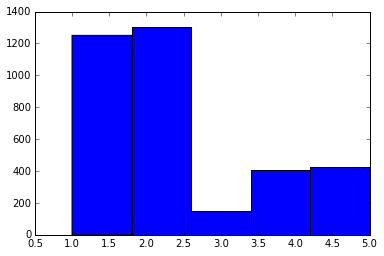

In [68]:
# load subcortical voxel info
Thalamus_voxel_coordinate = np.loadtxt('/home/despoB/connectome-thalamus/ROIs/thalamus_voxels_ijk_indices', dtype = int)

# sort CI vector
CIs = np.zeros(len(Thalamus_voxel_coordinate))
for i, thalamus_voxel_index in enumerate(Thalamus_voxel_coordinate[:,3]):
   CIs[i]= Thalamo_ParcelCIs[thalamus_voxel_index][0]
                        

# show histogram of CI distribution
CIs = CIs.astype(int)
plt.hist(CIs, bins=np.max(np.unique(CIs)))
plt.show()

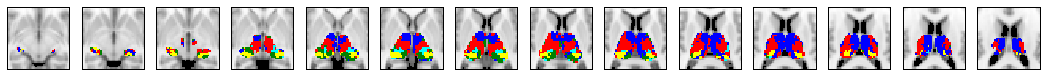

In [69]:
# show volum image
MNI_img = nib.load('/home/despoB/connectome-thalamus/ROIs/MNI152_T1_2mm_brain.nii.gz')
MNI_data = MNI_img.get_data()

# create mask for parcel
Mask = np.zeros(MNI_data.shape)

# assign CI to each subcortical voxel
for i, CI in enumerate(CIs):
    Mask[Thalamus_voxel_coordinate[i,0], Thalamus_voxel_coordinate[i,1], Thalamus_voxel_coordinate[i,2]] = CIs[i].astype(int)
Mask = np.ma.masked_where(Mask == 0, Mask)

# flip dimension to show anteiror of the brain at top
MNI_data = MNI_data.swapaxes(0,1)
Mask = Mask.swapaxes(0,1)

# some plot setting (colormap), interplotation..
#cmap = colors.ListedColormap(['red', 'blue', 'green', 'yellow', 'purple', 'black', 'white', 'cyan', 'yellow', 'cyan', 'pink'])
cmap = colors.ListedColormap(['blue', 'red', 'cyan', 'yellow', 'green'])
# display slice by slice
Z_slices = range(np.min(Thalamus_voxel_coordinate[:,2]), np.max(Thalamus_voxel_coordinate[:,2]),1)
fig = plt.figure()
for i, Z_slice in enumerate(Z_slices):
    a = plt.subplot(1, len(Z_slices), i+1 )
    a.set_yticks([])
    a.set_xticks([])
    plt.imshow(MNI_data[40:80, 25:65, Z_slice], cmap='gray', interpolation='nearest')
    plt.imshow(Mask[40:80, 25:65, Z_slice],cmap=cmap, interpolation='none')
    plt.ylim(plt.ylim()[::-1])
    
fig.set_size_inches(18.5,10.5) 
plt.savefig('Data/Tha_parcel.png', bbox_inches='tight')

In [33]:
CIs

array([1, 1, 1, ..., 3, 3, 3])

In [280]:
# Striatal Parcellation

In [39]:
#path to files ncessary for parcellation
path_to_adjmat = 'Data/StriatalCorticalAveMat'
path_to_list_of_subcorticalcortical_ROIs = 'Data/Striatalcortical_ROIs_index'
path_to_list_of_subcortical_voxels = 'Data/striatal_voxel_index'
path_to_list_of_cortical_ROIs ='Data/Cortical_ROI_index'
path_to_Cortical_CI = 'Data/MGH_CIv2'

#call function
Striatal_Targets, Striatal_ParcelCIs = FuncParcel.parcel_subcortical_network(path_to_adjmat, \
            path_to_list_of_subcorticalcortical_ROIs, \
            path_to_list_of_subcortical_voxels, path_to_list_of_cortical_ROIs, path_to_Cortical_CI)

True


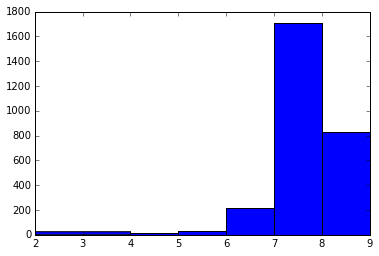

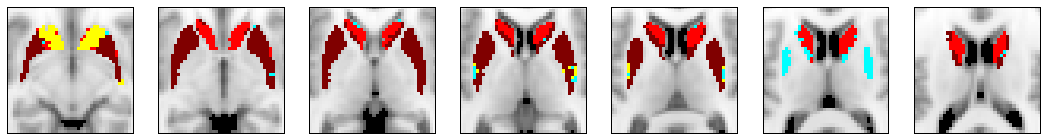

In [53]:
# load subcortical voxel info
Striatal_voxel_coordinate = np.loadtxt('Data/striatal_voxel_coordinate_ijk_RPI2mm_scaled', dtype = int)

# sort CI vector
CIs = np.zeros(len(Striatal_voxel_coordinate))
for i, Striatal_voxel_index in enumerate(Striatal_voxel_coordinate[:,3]):
   CIs[i], _, = stats.mode(Striatal_ParcelCIs[Striatal_voxel_index][0:5])

# show histogram of CI distribution
CIs = CIs.astype(int)
plt.hist(CIs, bins=np.unique(CIs)+1)
plt.show()


# show volum image
MNI_img = nib.load('Data/MNI152_T1_2mm_brain.nii')
MNI_data = MNI_img.get_data()

# create mask for parcel
Mask = np.zeros(MNI_data.shape)

# assign CI to each subcortical voxel
for i, CI in enumerate(CIs):
    Mask[Striatal_voxel_coordinate[i,0], Striatal_voxel_coordinate[i,1], Striatal_voxel_coordinate[i,2]] = CIs[i].astype(int)
Mask = np.ma.masked_where(Mask == 0, Mask)


# flip dimension to show anteiror of the brain at top
MNI_data = MNI_data.swapaxes(0,1)
Mask = Mask.swapaxes(0,1)

# some plot setting (colormap), interplotation..
cmap = colors.ListedColormap(['blue', 'cyan', 'purple', 'yellow', 'mediumvioletred', 'limegreen', 'maroon', 'red'])

# display slice by slice
Z_slices = range(np.min(Striatal_voxel_coordinate[:,2]+3), np.max(Striatal_voxel_coordinate[:,2]-3),2)
fig = plt.figure()
for i, Z_slice in enumerate(Z_slices):
    a = plt.subplot(1, len(Z_slices), i+1 )
    a.set_yticks([])
    a.set_xticks([])
    plt.imshow(MNI_data[40:80, 25:65, Z_slice], cmap='gray', interpolation='nearest')
    plt.imshow(Mask[40:80, 25:65, Z_slice], cmap=cmap, interpolation='nearest')
    plt.ylim(plt.ylim()[::-1])
    
fig.set_size_inches(18.5,10.5) 
plt.savefig('Data/Striatal_parcel.png',bbox_inches='tight')